In [6]:
import pandas as pd
df = pd.read_csv("cars.csv")
df

,manufacturer_name,model_name,transmission,color,odometer_value,year_produced,engine_fuel,engine_has_gas,engine_type,engine_capacity,...,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,duration_listed
0,Subaru,Outback,automatic,silver,190000,2010,gasoline,False,gasoline,2.5,...,True,True,True,False,True,False,True,True,True,16
1,Subaru,Outback,automatic,blue,290000,2002,gasoline,False,gasoline,3.0,...,True,False,False,True,True,False,False,False,True,83
2,Subaru,Forester,automatic,red,402000,2001,gasoline,False,gasoline,2.5,...,True,False,False,False,False,False,False,True,True,151
3,Subaru,Impreza,mechanical,blue,10000,1999,gasoline,False,gasoline,3.0,...,False,False,False,False,False,False,False,False,False,86
4,Subaru,Legacy,automatic,black,280000,2001,gasoline,False,gasoline,2.5,...,True,False,True,True,False,False,False,False,True,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38526,Chrysler,300,automatic,silver,290000,2000,gasoline,False,gasoline,3.5,...,True,False,False,True,True,False,False,True,True,301
38527,Chrysler,PT Cruiser,mechanical,blue,321000,2004,diesel,False,diesel,2.2,...,True,False,False,True,True,False,False,True,True,317
38528,Chrysler,300,automatic,blue,777957,2000,gasoline,False,gasoline,3.5,...,True,False,False,True,True,False,False,True,True,369
38529,Chrysler,PT Cruiser,mechanical,black,20000,2001,gasoline,False,gasoline,2.0,...,True,False,False,False,False,False,False,False,True,490


Revisión Inicial de datos.

¿Cuántos autos hay?

In [7]:
print(f"Número de autos: {df.shape[0]}")


Número de autos: 38531


¿Qué columnas contiene la base?

In [8]:
print (df.columns.tolist())

['manufacturer_name', 'model_name', 'transmission', 'color', 'odometer_value', 'year_produced', 'engine_fuel', 'engine_has_gas', 'engine_type', 'engine_capacity', 'body_type', 'has_warranty', 'state', 'drivetrain', 'price_usd', 'is_exchangeable', 'location_region', 'number_of_photos', 'up_counter', 'feature_0', 'feature_1', 'feature_2', 'feature_3', 'feature_4', 'feature_5', 'feature_6', 'feature_7', 'feature_8', 'feature_9', 'duration_listed']


¿Hay datos faltantes o inconsistencias?

In [9]:
df.isnull().sum()

manufacturer_name     0
model_name            0
transmission          0
color                 0
odometer_value        0
year_produced         0
engine_fuel           0
engine_has_gas        0
engine_type           0
engine_capacity      10
body_type             0
has_warranty          0
state                 0
drivetrain            0
price_usd             0
is_exchangeable       0
location_region       0
number_of_photos      0
up_counter            0
feature_0             0
feature_1             0
feature_2             0
feature_3             0
feature_4             0
feature_5             0
feature_6             0
feature_7             0
feature_8             0
feature_9             0
duration_listed       0
dtype: int64

2. ¿Qué marcas tienen los precios promedio más altos y bajos?

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

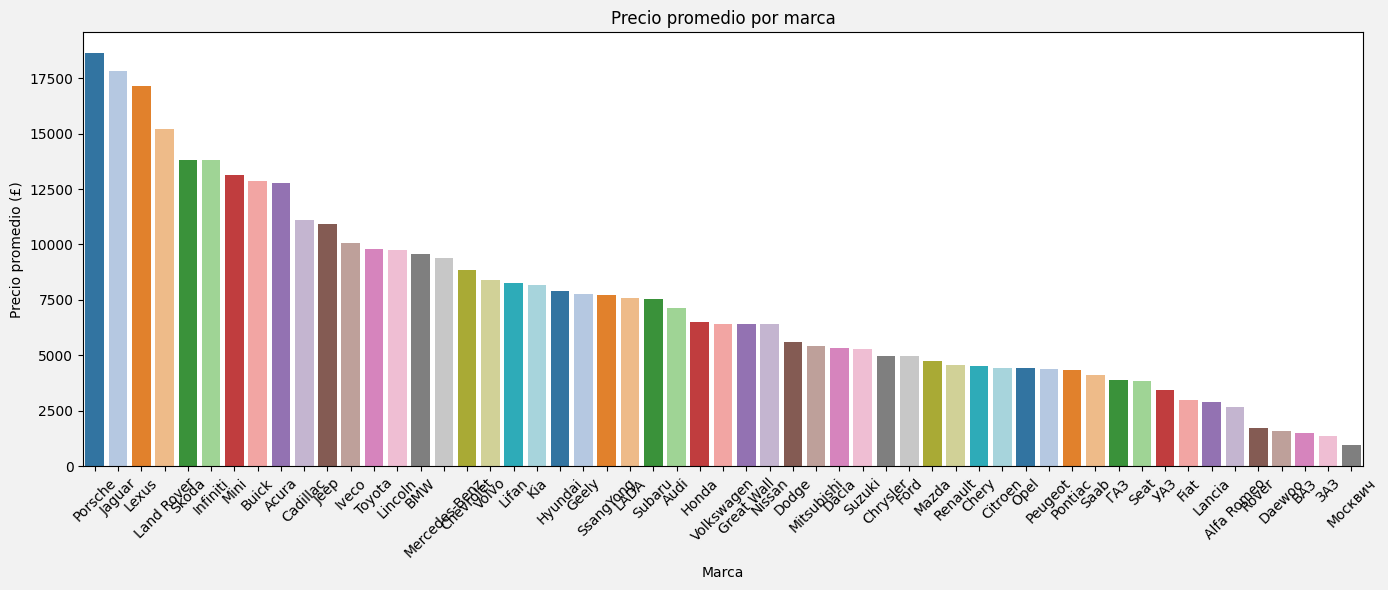

In [11]:
# Agrupamos y calculamos precio promedio por marca
mean_prices = df.groupby('manufacturer_name')['price_usd'].mean().sort_values(ascending=False)
# Convertir a DataFrame
mean_prices_df = mean_prices.reset_index()
mean_prices_df.columns = ['manufacturer_name', 'price_usd']

# Crear la figura con color de fondo personalizado
fig, ax = plt.subplots(figsize=(14, 6))
fig.patch.set_facecolor('#f2f2f2')      # Color del fondo de la figura
ax.set_facecolor('#ffffff')             # Color del fondo del área de los ejes (el "canvas")

# Gráfico de barras
barplot = sns.barplot(
    data=mean_prices_df,
    x='manufacturer_name',
    y='price_usd',
    hue='manufacturer_name',
    palette='tab20',
    dodge=False,
    legend=False,
    ax=ax
)
# Personalizar ejes y título
plt.xticks(rotation=45)
plt.title('Precio promedio por marca')
plt.xlabel('Marca')
plt.ylabel('Precio promedio (£)')
plt.tight_layout()
plt.show()

3. ¿El kilometraje afecta el precio?


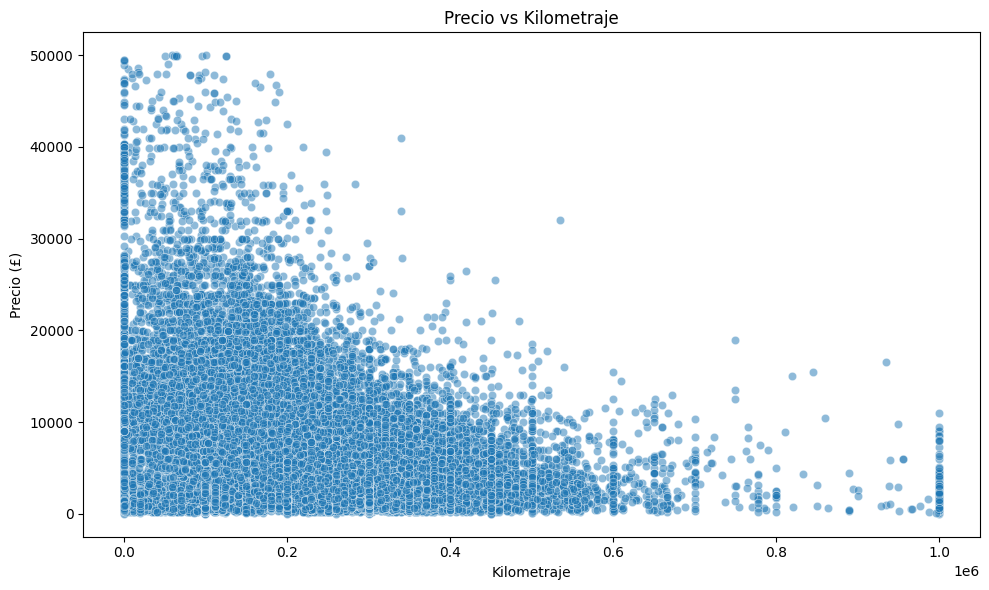

In [12]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='odometer_value', y='price_usd', alpha=0.5)
plt.title('Precio vs Kilometraje')
plt.xlabel('Kilometraje')
plt.ylabel('Precio (£)')
plt.tight_layout()
plt.show()

In [14]:
correlation = df['price_usd'].corr(df['odometer_value'])
print(f"Correlación entre precio y kilometraje: {correlation:.2f}")

Correlación entre precio y kilometraje: -0.42


4. ¿Qué tipo de transmisión conviene más?
Algunos compradores prefieren el automático, otros el manual. ¿Qué tipo es más común y costoso


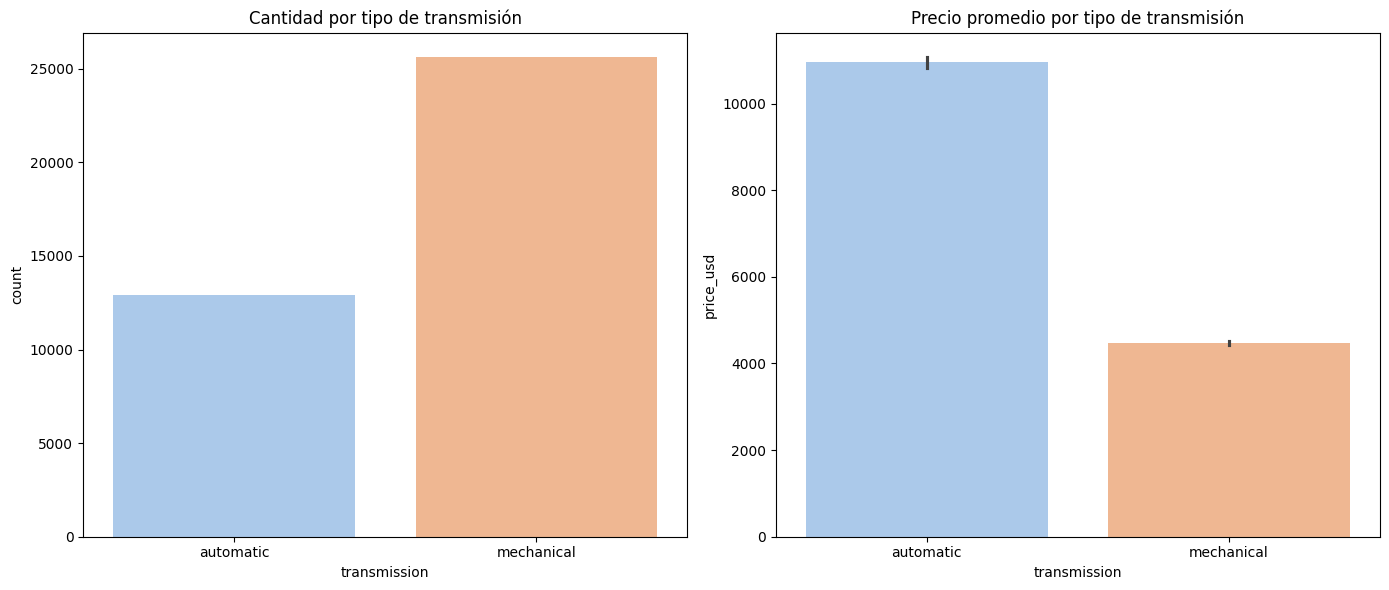

In [16]:
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

sns.countplot(data=df, x="transmission", hue="transmission", ax=ax[0], palette="pastel")
ax[0].set_title("Cantidad por tipo de transmisión")

sns.barplot(data=df, x="transmission", y="price_usd", ax=ax[1], hue="transmission", palette="pastel")
ax[1].set_title("Precio promedio por tipo de transmisión")

plt.tight_layout()
plt.show()

5. ¿Qué años de fabricación tienen mejor relación costo-beneficio?

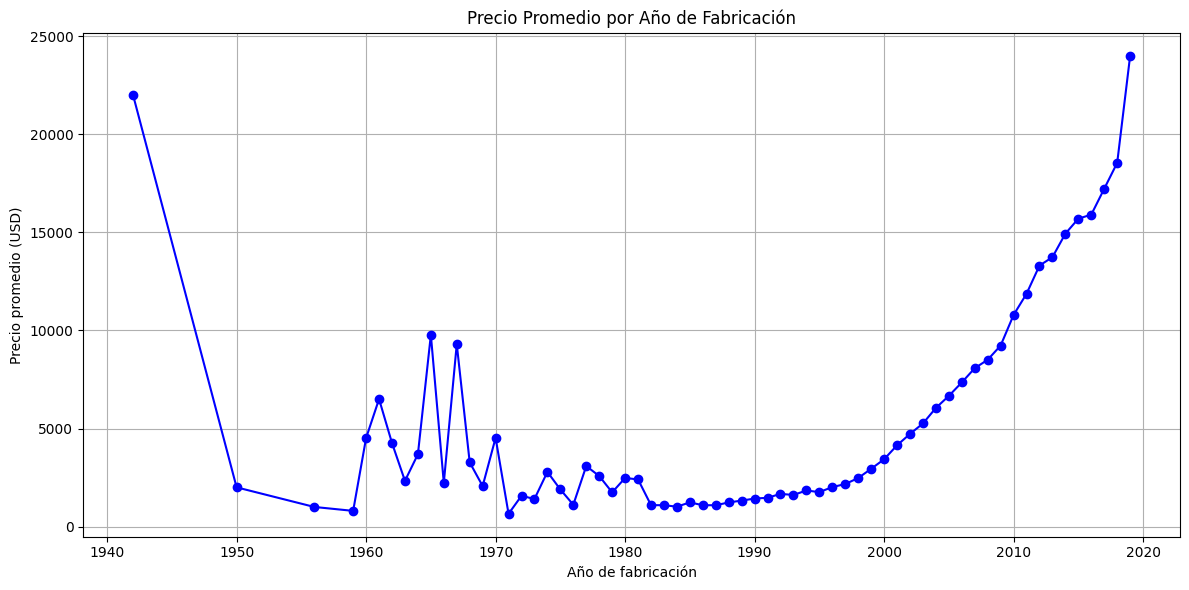

In [17]:
# Calcular el precio promedio por año
precio_promedio_por_ano = df.groupby('year_produced')['price_usd'].mean()

# Visualizar la relación entre precio y año
plt.figure(figsize=(12, 6))
precio_promedio_por_ano.plot(kind='line', color='blue', marker='o')
plt.title('Precio Promedio por Año de Fabricación')
plt.xlabel('Año de fabricación')
plt.ylabel('Precio promedio (USD)')
plt.grid(True)
plt.tight_layout()
plt.show()

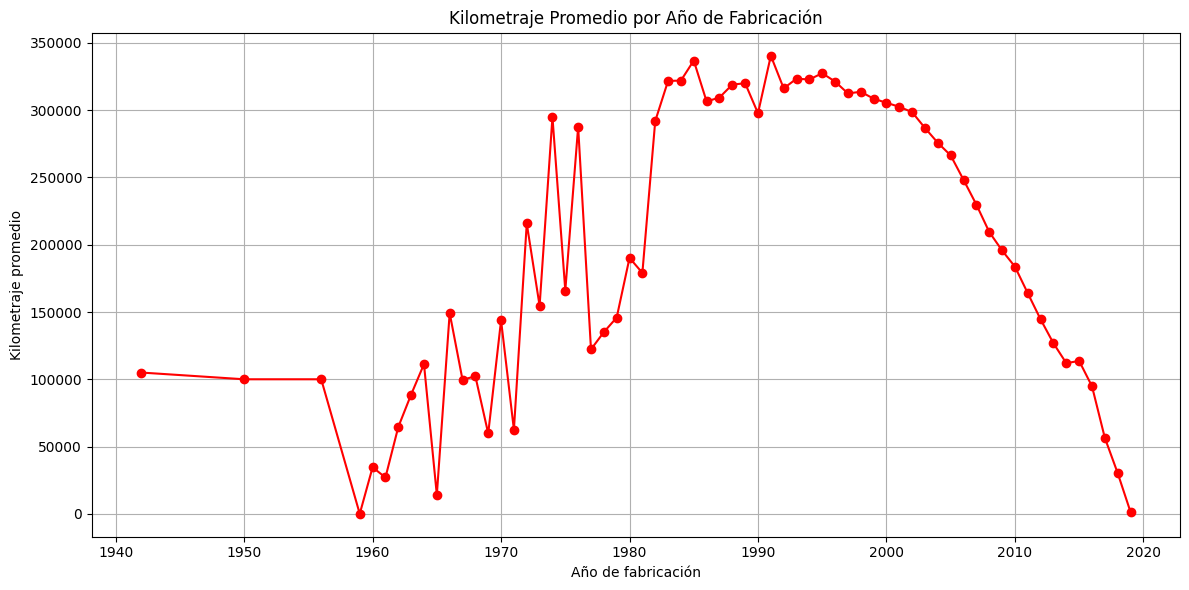

In [18]:
# Calcular el kilometraje promedio por año
kilometraje_promedio_por_ano = df.groupby('year_produced')['odometer_value'].mean()

# Visualizar la relación entre kilometraje y año
plt.figure(figsize=(12, 6))
kilometraje_promedio_por_ano.plot(kind='line', color='red', marker='o')
plt.title('Kilometraje Promedio por Año de Fabricación')
plt.xlabel('Año de fabricación')
plt.ylabel('Kilometraje promedio')
plt.grid(True)
plt.tight_layout()
plt.show()

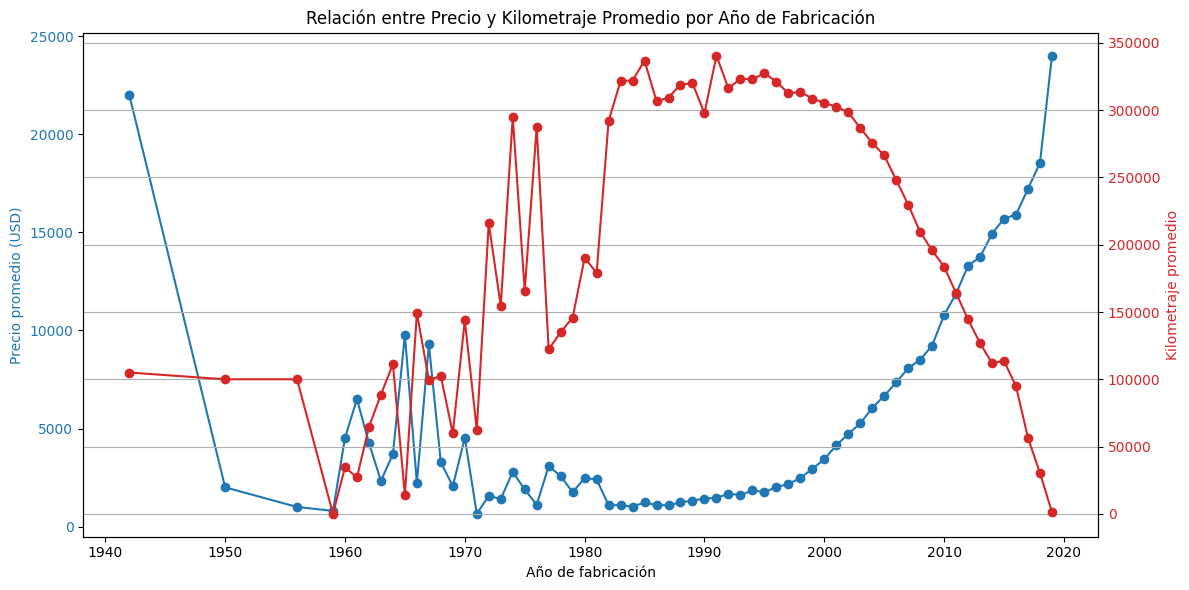

In [19]:
# Crear un gráfico combinado con precio y kilometraje promedio por año
fig, ax1 = plt.subplots(figsize=(12, 6))

# Gráfico para precio
color = 'tab:blue'
ax1.set_xlabel('Año de fabricación')
ax1.set_ylabel('Precio promedio (USD)', color=color)
ax1.plot(precio_promedio_por_ano.index, precio_promedio_por_ano.values, color=color, marker='o')
ax1.tick_params(axis='y', labelcolor=color)

# Gráfico para kilometraje
ax2 = ax1.twinx()  # Instancia un segundo eje y para el kilometraje
color = 'tab:red'
ax2.set_ylabel('Kilometraje promedio', color=color)
ax2.plot(kilometraje_promedio_por_ano.index, kilometraje_promedio_por_ano.values, color=color, marker='o')
ax2.tick_params(axis='y', labelcolor=color)

plt.title('Relación entre Precio y Kilometraje Promedio por Año de Fabricación')
plt.grid(True)
plt.tight_layout()
plt.show()

6. ¿Qué tipo de combustible rinde más (mpg)?

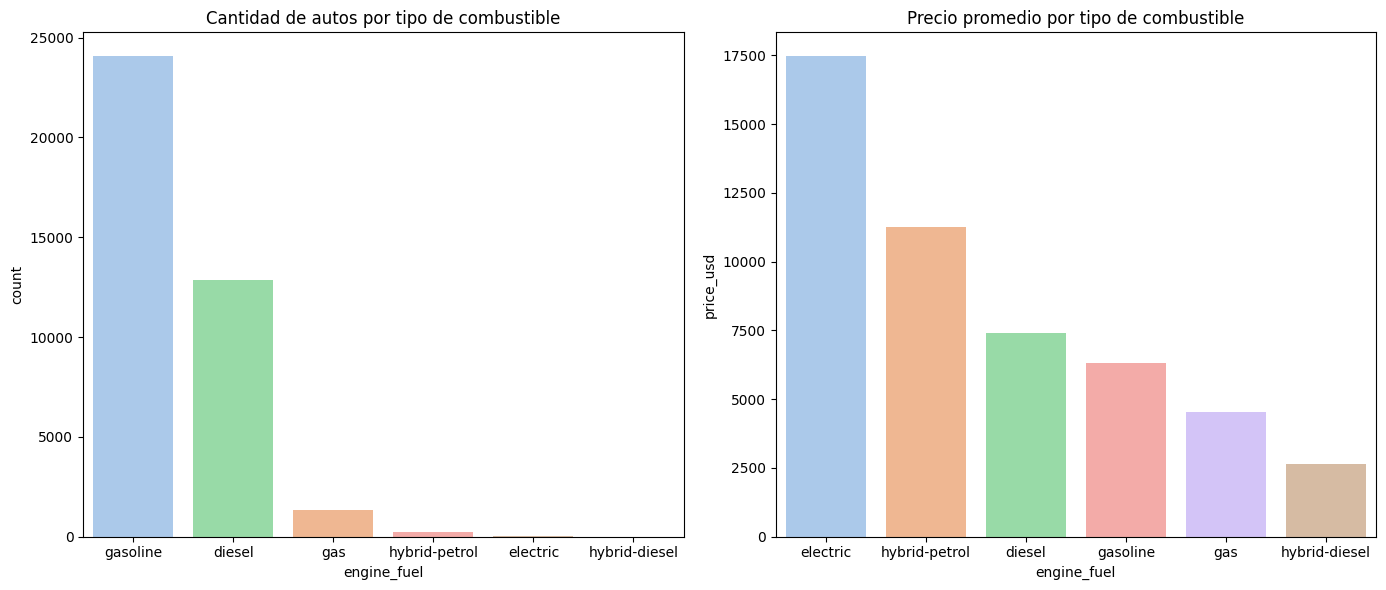

In [20]:
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

sns.countplot(data=df, x="engine_fuel", hue="engine_fuel", ax=ax[0], palette="pastel", order=df["engine_fuel"].value_counts().index)
ax[0].set_title("Cantidad de autos por tipo de combustible")

avg_price_fuel = df.groupby("engine_fuel")["price_usd"].mean().reset_index().sort_values(by="price_usd", ascending=False)
sns.barplot(data=avg_price_fuel, x="engine_fuel", y="price_usd", ax=ax[1], hue="engine_fuel", palette="pastel", order=avg_price_fuel["engine_fuel"])
ax[1].set_title("Precio promedio por tipo de combustible")

plt.tight_layout()
plt.show()